In [1]:
import pandas as pd
import numpy as np
import re
from itertools import repeat

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import matplotlib.patches as patches
import matplotlib.lines as lines

In [3]:
aaconv = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M',
     'H1S': 'H', 'H2S': 'H'}

In [4]:
celllines_mapped = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
celllines_mutations = pd.read_csv("../../GEMICCL/Mutation.csv", sep = "\t")

C:\Users\ds728\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Get only cell lines with ID
celllines_mapped = celllines_mapped.drop_duplicates(subset = ["dsIdx"])
celllines_mapped = celllines_mapped.dropna(subset = ["ID"])
sample_data_tissue = celllines_mapped["DI"].tolist()

In [6]:
tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", columns = ["Cancer", "Origin"])
tissue_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()

In [7]:
tissue_type = []
for item in sample_data_tissue:
    if pd.isnull(item):
        tissue_type.append("Unknown") 
    elif item == "[]":
        tissue_type.append("Unknown")
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)
        
cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
cancer_subtype = [tissue_origin_dict.get(item) for item in tissue_type]
celllines_mapped["Tissue"] = cell_origin
celllines_mapped["Cancer_Type"] = tissue_type

In [8]:
celllines_mapped

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,dsIdx,sCode,sName,dsCode,dsPert,dsAmount,dsUser1,...,OI,OX,RX,ST,SX,SY,TAG,WW,Tissue,Cancer_Type
0,0,0,0,1,S404286,Batch5_SHP77_2,20140917162616309-936809,Batch5_SHP77,31.0,Batch5_SHP77_2,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung,Small cell lung carcinoma
1,1,1,1,2,S404286,Batch5_SHP77_2,20140917162617937-936810,Batch5_SHP77,31.0,Batch5_SHP77_2,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung,Small cell lung carcinoma
2,2,2,2,3,S404298,Batch5_PC9_2,20140917162619670-936811,Batch5_PC9,66.1,Batch5_PC9_2,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['DOI=10.5795/jjscc.24.451;', 'PubMed=1737336;...","['Source(s): PubMed=25877200', 'Amelogenin: X'...",Male,PC9; PC-9/S1; PC-9S1,PC9,['http://tcpaportal.org/mclp/'],Lung,Lung adenocarcinoma
3,3,3,3,4,S404298,Batch5_PC9_2,20140917162621386-936812,Batch5_PC9,66.1,Batch5_PC9_2,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['DOI=10.5795/jjscc.24.451;', 'PubMed=1737336;...","['Source(s): PubMed=25877200', 'Amelogenin: X'...",Male,PC9; PC-9/S1; PC-9S1,PC9,['http://tcpaportal.org/mclp/'],Lung,Lung adenocarcinoma
4,4,4,4,5,S404285,Batch5_SHP77_1,20140917162626101-936815,Batch5_SHP77,31.0,Batch5_SHP77_1,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung,Small cell lung carcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1551,1551,1292,S404269,Batch7_EKVX_3,20140917165959026-938212,Batch7_EKVX,56.1,Batch7_EKVX_3,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=2041050;', 'PubMed=3957463;', 'PubMed...",['Source(s): Cosmic-CLP; PubMed=19372543; PubM...,Male,NaN,EKVX,['https://dtp.cancer.gov/discovery_development...,Lung,Lung adenocarcinoma
1230,1230,1552,1552,1293,S404217,Batch6A_DU4475_3,20140917170000427-938213,Batch6A_DU4475,NaN,Batch6A_DU4475_3,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=221108;', 'PubMed=10862037;', 'PubMed...",['Source(s): ATCC; Cosmic-CLP; DSMZ; PubMed=25...,Female,DU-4475; Du-4475; DU 4475; Du 4475; Duke Unive...,DU4475,['https://physics.cancer.gov/docs/bioresource/...,Breast,Breast carcinoma
1231,1231,1553,1553,1294,S404217,Batch6A_DU4475_3,20140917170001804-938214,Batch6A_DU4475,NaN,Batch6A_DU4475_3,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=221108;', 'PubMed=10862037;', 'PubMed...",['Source(s): ATCC; Cosmic-CLP; DSMZ; PubMed=25...,Female,DU-4475; Du-4475; DU 4475; Du 4475; Duke Unive...,DU4475,['https://physics.cancer.gov/docs/bioresource/...,Breast,Breast carcinoma
1232,1232,1554,1554,1295,S404236,Batch6B_SF539_1,20140917170003120-938215,Batch6B_SF539,42.0,Batch6B_SF539_1,...,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=2041050;', 'PubMed=3019542;', 'PubMed...",['Source(s): Cosmic-CLP; PubMed=19372543; PubM...,Female,SF-539; SF-539 BT; SF 539,SF539,['https://dtp.cancer.gov/discovery_development...,Brain,Gliosarcoma


In [9]:
celllines_list = celllines_mapped["ID"].unique().tolist()

In [10]:
len(celllines_list)

173

In [11]:
tp53_allmutations = celllines_mutations[celllines_mutations["HGNC"] == "TP53"]
tp53_allmutations = tp53_allmutations[tp53_allmutations["MutationType"] != "Silent"]
tp53_mutations = celllines_mutations[celllines_mutations["HGNC"] == "TP53"]
tp53_mutations = tp53_mutations[tp53_mutations["MutationType"] == "Missense"]

In [12]:
tp53_dict = {}
mutations_noduplicates = []
for cellline in celllines_list:
    print(cellline)
    mutations_in_cellline = tp53_mutations[tp53_mutations["CellLineName_Cellosaurus"] == cellline]
    mutations_in_cellline = mutations_in_cellline.drop_duplicates(subset = "AA_Mutation")
    if (mutations_in_cellline.shape[0]) == 0:
        allmutations_in_cellline = tp53_allmutations[tp53_allmutations["CellLineName_Cellosaurus"] == cellline]
        if (allmutations_in_cellline.shape[0]) == 0:
            tp53_dict[cellline] = ["WT"]
        else:
            tp53_dict[cellline] = ["Other"]

    else:
        mutations_noduplicates.append(mutations_in_cellline)
        tp53_dict[cellline] = mutations_in_cellline["AA_Mutation"].tolist()

SHP-77
PC-9
LUDLU-1
PC14PE6
NCI-H446
Malme-3M
NCI-H1755
NCI-H2135
HCC1187
COR-L88
NCI-H2171
NCI-H1155
ChaGo-K-1
SNB-75
HOP-62
NCI-H1838
SUM149PT
OVCAR-3
MDA-MB-231
COR-L279
NCI-H1734
RPMI-8226
Calu-1
Calu-3
KM12
HCC1937
MOLT-4
HARA [Human squamous cell lung carcinoma]
COR-L23
SN12C
UACC-62
HCC38
NCI-H226
MIA PaCa-2
CAL-51
NCI-H441
786-O
SF295
HPAC
DMS 53
UMC-11
RXF 393L
SK-MEL-2
DU145
J82
NCI-H2228
Hs 578T
PANC-1
5637
UACC-257
NCI-H1693
NCI-H2444
NCI-H209
M14
NCI-H1993
COLO 205
NCI-H510A
HCC1395
UM-UC-3
BT-549
HCC1806
NCI-H2073
NCI-H2030
MDA-MB-436
NCI-H1975
MDA-MB-468
NCI-H358
BT-20
NCI-H2170
NCI-H2291
NCI-H1703
NCI-H520
NCI-H2172
HCC70
NCI-H522
LK-2
VM-CUB-1
T-47D
Hx147
NCI-H2085
NCI-H2122
NCIH460
NCI-H1437
NCI-H596
IGROV-1
BxPC-3
Calu-6
OVCAR-4
OVCAR-8
NCI-H1299
LOX-IMVI
SW900
RERF-LC-Sq1
HCC1143
NCI-H647
MDA-MB-157
NCI-H1395
KP-4
HCC15
NCI-H292
NCI-H838
PC-3
769-P
EPLC-272H
HT-1197
SK-LU-1
Panc 03.27
A-498
HT-1376
A-549
HOP-92
ACHN
NCI-H322
NCI-H2347
NCI-H3255
T24
SU.86.86
SCaBER
M

In [13]:
mutationdataframe = pd.DataFrame(pd.concat(mutations_noduplicates)["AA_Mutation"])

In [14]:
mutationdataframe['A'], mutationdataframe['Mutation'] = mutationdataframe['AA_Mutation'].str.split('p.', 1).str

C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [15]:
count_series = mutationdataframe.groupby(['Mutation']).size()

In [16]:
mutation_frequencyframe = count_series.to_frame(name = 'Counts').reset_index()
mutation_frequencyframe = mutation_frequencyframe.sort_values("Counts", ascending = False)
mutation_frequencyframe["Residue"] = mutation_frequencyframe["Mutation"].apply(lambda x: x[1:-1])

In [17]:
mutation_frequencyframe_only = mutation_frequencyframe[["Mutation", "Residue"]]
mutationcount_aggregate = mutation_frequencyframe.groupby(["Residue"]).sum()
mutation_frequencyframe = mutation_frequencyframe_only.merge(mutationcount_aggregate, on = "Residue")

In [18]:
mutation_max = max(mutation_frequencyframe["Counts"])

In [19]:
## Combine labels
mutationcountlist = []
mutationlist = mutation_frequencyframe["Mutation"].unique()
for residue in mutation_frequencyframe["Residue"]:
    mutationframe = (mutation_frequencyframe.loc[mutation_frequencyframe["Residue"] == residue])
    mutationlist = mutationframe["Mutation"].unique()
    mutationcountlist.append((mutationlist.tolist(), int(mutation_frequencyframe.loc[mutation_frequencyframe["Residue"] == residue]["Counts"].values[0]), residue))

In [20]:
processed_dataframe = pd.DataFrame(mutationcountlist,columns=['Mutations', 'Count', "Residue"])
processed_dataframe = processed_dataframe.drop_duplicates(subset = "Residue")
processed_dataframe = pd.DataFrame(mutationcountlist,columns=['Mutations', 'Count', "Residue"])

In [21]:
processed_dataframe["Mutations"] = processed_dataframe["Mutations"].apply(lambda x: x[0] +  "/" + "/".join([x[n][-1] for n in range(1,len(x))]) if len(x) >1 else x[0])
processed_dataframe= processed_dataframe.drop_duplicates()

In [22]:
processed_dataframe.to_csv("./TP53_mutation_frequencyframe.csv")

In [23]:
# Generate a mutationlist for the countplot
mutationlist = []
for index, columns in processed_dataframe.iterrows():
    mutationlist.extend(repeat(int(columns["Residue"]), int(columns["Count"])))
    
print(mutationlist)

[273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 248, 248, 248, 248, 248, 248, 248, 248, 175, 175, 175, 175, 175, 245, 245, 245, 245, 220, 220, 220, 237, 237, 157, 157, 241, 241, 242, 242, 242, 154, 154, 249, 249, 158, 158, 158, 267, 110, 16, 135, 36, 36, 280, 280, 282, 215, 143, 272, 274, 126, 126, 250, 309, 278, 176, 176, 176, 275, 277, 259, 258, 271, 285, 113, 187, 262, 266, 360, 179, 193, 162, 132, 320, 130, 194, 246, 223, 236]


In [24]:
tp53_dict

{'SHP-77': ['p.C176W'],
 'PC-9': ['WT'],
 'LUDLU-1': ['p.R248W'],
 'PC14PE6': ['WT'],
 'NCI-H446': ['p.G154V'],
 'Malme-3M': ['WT'],
 'NCI-H1755': ['p.C242F'],
 'NCI-H2135': ['p.C277F'],
 'HCC1187': ['Other'],
 'COR-L88': ['p.V157F'],
 'NCI-H2171': ['Other'],
 'NCI-H1155': ['p.R273H'],
 'ChaGo-K-1': ['p.C275F'],
 'SNB-75': ['p.E258K'],
 'HOP-62': ['Other'],
 'NCI-H1838': ['p.R273L'],
 'SUM149PT': ['WT'],
 'OVCAR-3': ['p.R248Q'],
 'MDA-MB-231': ['p.R280K'],
 'COR-L279': ['Other'],
 'NCI-H1734': ['p.R273L'],
 'RPMI-8226': ['p.E285K'],
 'Calu-1': ['WT'],
 'Calu-3': ['p.M237I'],
 'KM12': ['p.H179R'],
 'HCC1937': ['Other'],
 'MOLT-4': ['Other'],
 'HARA [Human squamous cell lung carcinoma]': ['p.V143A'],
 'COR-L23': ['WT'],
 'SN12C': ['Other'],
 'UACC-62': ['WT'],
 'HCC38': ['p.R273L'],
 'NCI-H226': ['WT'],
 'MIA PaCa-2': ['p.R248W'],
 'CAL-51': ['WT'],
 'NCI-H441': ['p.R158L'],
 '786-O': ['p.R248W', 'p.P278A'],
 'SF295': ['p.R248Q'],
 'HPAC': ['p.G187R'],
 'DMS 53': ['p.S241F'],
 'UMC-11': 

In [25]:
conformation = [175, 249, 245, 163, 175, 176, 179, 242, 157, 220, 193, 157, 195]
contact = [248, 273, 248, 273, 282, 245, 241 ,220, 281, 241]

mutation_types = {}
unknown_aa = []
for key in tp53_dict:
    mutationeffects = []
    mutations = tp53_dict[key]
    for mutant in mutations:
        if mutant in ["WT", "Other"]:
            mutationeffects.append(mutant)
        else:
            mutationaa = int(re.search(r'\d+', mutant).group())
            if mutationaa in conformation:
                mutationeffects.append("conformation")
            elif mutationaa in contact:
                mutationeffects.append("contact")
            else:
                #print(mutationaa)
                unknown_aa.append(mutant)
                mutationeffects.append("unknown")
    mutation_types[key] = mutationeffects

In [26]:
residue_typecolumn = []
for index, row in processed_dataframe.iterrows():
    if (int(row["Residue"])) in conformation:
        residue_typecolumn.append("Conformation")
    elif (int(row["Residue"])) in contact:
        residue_typecolumn.append("Contact")
    else:
        residue_typecolumn.append("Unknown")

In [27]:
processed_dataframe["Type"] = residue_typecolumn

In [28]:
processed_dataframe.head()

,Mutations,Count,Residue,Type
0,R273H/L/C,13,273,Contact
3,R248Q/W,8,248,Contact
5,R175H/L,5,175,Conformation
7,G245S/C,4,245,Conformation
9,Y220C,3,220,Conformation


In [29]:
processed_dataframe_sig = processed_dataframe[processed_dataframe["Count"] >= 4]

In [30]:
contactmutants = processed_dataframe[processed_dataframe["Type"] == "Contact"]
conformationmutants = processed_dataframe[processed_dataframe["Type"] == "Conformation"]
unknownmutants = processed_dataframe[processed_dataframe["Type"] == "Unknown"]

contactmutationlist = []
for index, columns in contactmutants.iterrows():
    contactmutationlist.extend(repeat(int(columns["Residue"]), int(columns["Count"])))
    
conformationmutationlist = []
for index, columns in conformationmutants.iterrows():
    conformationmutationlist.extend(repeat(int(columns["Residue"]), int(columns["Count"])))

unknownmutationlist = []
for index, columns in unknownmutants.iterrows():
    unknownmutationlist.extend(repeat(int(columns["Residue"]), int(columns["Count"])))

In [31]:
protein_length = 393

In [32]:
x = range(1,protein_length)
contactmutantcount = []
contactmutantcount_nozeroes = []
for i in x:
    if contactmutationlist.count(i) != 0:
        contactmutantcount.append(contactmutationlist.count(i))
        contactmutantcount_nozeroes.append(contactmutationlist.count(i))
    elif contactmutationlist.count(i) == 0:
        contactmutantcount.append(-1)
        
conformationmutantcount = []
conformationmutantcount_nozeroes = []
for i in x:
    if conformationmutationlist.count(i) != 0:
        conformationmutantcount.append(conformationmutationlist.count(i))
        conformationmutantcount_nozeroes.append(conformationmutationlist.count(i))
    elif conformationmutationlist.count(i) == 0:
        conformationmutantcount.append(-1)
        
unknownmutantcount = []
unknownmutantcount_nozeroes = []
for i in x:
    if unknownmutationlist.count(i) != 0:
        unknownmutantcount.append(unknownmutationlist.count(i))
        unknownmutantcount_nozeroes.append(unknownmutationlist.count(i))
    elif unknownmutationlist.count(i) == 0:
        unknownmutantcount.append(-1)

In [33]:
matplotlib.rcParams['figure.figsize'] = [20, 5]

In [34]:
def plotrec(x1, x2, y, name, color):
    width = abs(x2-x1)
    height = 1.25
    axes.add_patch(patches.Rectangle([x1, y], width, height, lw = 2, facecolor = color, edgecolor = "k", zorder = 100, clip_on=False))
    axes.text(x1+(width/2),-2.5, name, size = 20, clip_on=False, zorder= 101, horizontalalignment = "center", verticalalignment = "center")

In [35]:
TP53_subunits = {"TAD": [1, 44, sns.color_palette("Set3")[0]], "DNA Binding": [102, 292, sns.color_palette("Set3")[2]], "Oligo": [325, 356, sns.color_palette("Set3")[5]]}

C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significan

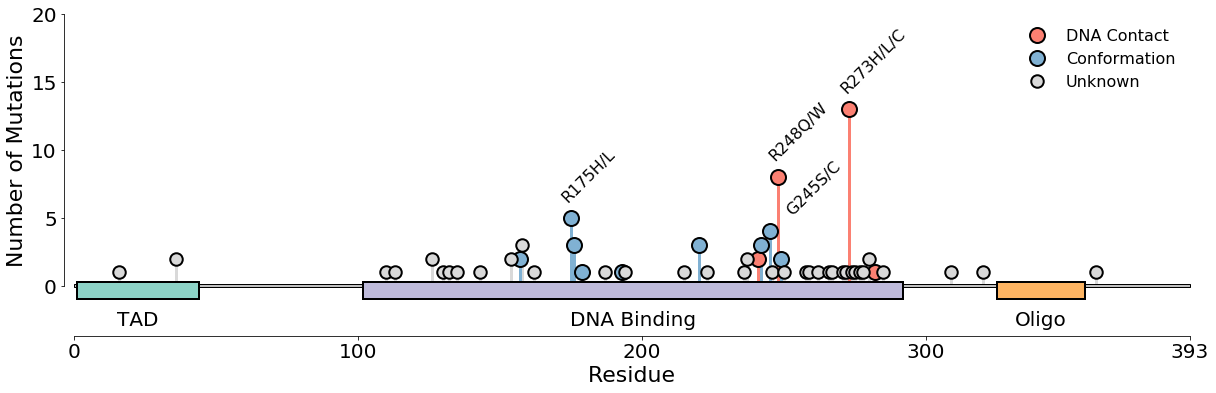

In [37]:
# Generate plot
fig = plt.figure()
axes = fig.add_subplot(111)

#Contact mutations
(markers, stemlines, baseline) = plt.stem(x, contactmutantcount)
plt.setp(markers, markersize=15, markeredgecolor="k", markeredgewidth=2, c = sns.color_palette("Set3")[3], zorder = 10)
plt.setp(stemlines, color=sns.color_palette("Set3")[3], linewidth=3 , zorder = 5)

(markers2, stemlines2, baseline2) = plt.stem(x, conformationmutantcount)
plt.setp(markers2, markersize=15, markeredgecolor="k", markeredgewidth=2, c = sns.color_palette("Set3")[4], zorder = 10)
plt.setp(stemlines2, color=sns.color_palette("Set3")[4], linewidth=3 , zorder = 4)

(markers3, stemlines3, baseline3) = plt.stem(x, unknownmutantcount)
plt.setp(markers3, markersize=12.5, markeredgecolor="k", markeredgewidth=2, c = sns.color_palette("Set3")[8], zorder = 10)
plt.setp(stemlines3, color=sns.color_palette("Set3")[8], linewidth=3 , zorder = 3)


sns.despine(offset = {"left":10, "bottom":50})

axes.set_ylim([0,mutation_max+1])
axes.set_xlim([0,protein_length])
axes.set_xticks([0,100,200, 300,protein_length])
axes.set_yticks([0,5,10,15,20])

plt.xticks(size =20)
plt.yticks(size = 20)

# Add rectangles
for key, residues in TP53_subunits.items():
        plotrec(residues[0],residues[1], -1, key, residues[2])
plt.axhline(0, c = "k", zorder = 6)

axes.add_patch(patches.Rectangle([0, -0.125], protein_length, 0.25, edgecolor = "k", facecolor = "#C0C0C0", zorder = 99, clip_on=False))

for index, row in processed_dataframe_sig.iterrows():
    if row["Mutations"] == "G245S/C":    
        axes.text(int(row["Residue"])+5, int(row["Count"])+1,row["Mutations"], verticalalignment = "bottom", size = 16, zorder = 300, rotation = 45)
    else:
        axes.text(int(row["Residue"])-4, int(row["Count"])+1,row["Mutations"], verticalalignment = "bottom", size = 16, zorder = 300, rotation = 45)

plt.legend((markers, markers2, markers3), ("DNA Contact", "Conformation", "Unknown"), frameon = False, prop={'size': 16})

plt.ylabel("Number of Mutations", size = 22)
plt.xlabel("Residue", size = 22)

plt.savefig("TP53_mutationfrequencyplot_v2.pdf", bbox_inches = "tight")

In [38]:
celllines_mapped["TP53_status"] = celllines_mapped["ID"].map(mutation_types)
celllines_mapped['TP53_status'] = [','.join(map(str, l)) for l in celllines_mapped['TP53_status']]

In [39]:
celllines_mapped_TP53_interesting = celllines_mapped[~celllines_mapped["TP53_status"].isin(["unknown","conformation,contact", 'unknown,unknown' ])]

In [40]:
celllines_mapped_TP53_interesting["TP53_status"] = celllines_mapped_TP53_interesting["TP53_status"].str.replace('contact,unknown', "contact")
celllines_mapped_TP53_interesting["TP53_status"] = celllines_mapped_TP53_interesting["TP53_status"].str.replace('conformation,unknown', "conformation")
celllines_mapped_TP53_interesting["TP53_status"] = celllines_mapped_TP53_interesting["TP53_status"].str.replace('unknown,contact', "contact")
celllines_mapped_TP53_interesting["TP53_status"] = celllines_mapped_TP53_interesting["TP53_status"].str.replace('contact,unknown', "contact")

C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [41]:
coldata_array = celllines_mapped_TP53_interesting[["dsIdx", "Tissue", "Cancer_Type", "TP53_status"]].set_index("dsIdx")

In [42]:
coldata_array_noother = coldata_array[coldata_array["TP53_status"] != "Other"]

In [43]:
coldata_array_noother.to_csv("coldata_tp53mutation.csv")

In [44]:
celllines_wanted = coldata_array_noother.index.tolist()
celllines_wanted = list(map(str, celllines_wanted) )

In [48]:
metabolite_data = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv")

In [49]:
metabolite_data = metabolite_data.set_index("ionIdx")
metabolite_data = metabolite_data.drop("ionMz", axis =1)
metabolite_data = metabolite_data[celllines_wanted]

In [50]:
metabolite_data

,1,2,3,4,5,6,7,8,9,10,...,1259,1260,1273,1274,1283,1284,1287,1288,1293,1294
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,10755,9608,9434,9720,8356,7814,8998,9164,6230,7931,...,7686,7707,6826,8391,5741,4999,6566,5004,6683,6125
2,3507,3938,3836,4311,4534,7250,2338,3386,1506,2998,...,4285,4639,897,1775,3816,348,1463,1281,757,1059
3,61335,64959,78616,78619,58873,64141,61454,62215,42346,47793,...,41223,43958,59602,56425,35002,39957,33828,30939,22271,31315
4,4178,4586,5914,4963,4268,5809,3971,6174,4275,5218,...,2265,4320,7970,3862,3094,4541,4638,3525,7556,5147
5,4124,6969,11827,11233,3640,4308,5750,6529,4072,5716,...,3405,3452,5870,3671,2969,3692,2812,3423,2598,1084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2752,2993,1722,2304,2587,3685,6248,5451,3976,3969,...,2238,2245,1682,1661,1845,1320,1362,1450,3320,3018
1096,-286,-355,-348,167,-326,-357,557,814,683,380,...,723,784,268,24,2047,2230,677,979,1359,867
1097,1574,1171,1039,576,1868,1414,2668,1465,2089,1456,...,296,435,411,427,176,223,52,173,181,288


In [51]:
metabolite_data.to_csv("assaydata_tp53mutation.csv")

In [52]:
metabolite_reference = pd.read_csv("../../AZ_data/Metabolite_reference_table.csv", index_col = "ionIdx")

In [53]:
metabolite_reference.to_csv("rowdata_tp53mutation.csv")

## Contact vs WT

In [54]:
conformation_coldata_array_noother = coldata_array_noother[coldata_array_noother["TP53_status"] != "contact"]

In [55]:
conformation_coldata_array_noother.to_csv("Contact_coldata_tp53_mutation.csv")

In [56]:
celllines_wanted_contact = conformation_coldata_array_noother.index.tolist()
celllines_wanted_contact = list(map(str, celllines_wanted_contact) )

In [57]:
metabolite_data_contact = metabolite_data[celllines_wanted_contact]

In [58]:
metabolite_data_contact.to_csv("Contact_assaydata_tp53mutation.csv")

## Conformation vs WT

In [59]:
contact_coldata_array_noother = coldata_array_noother[coldata_array_noother["TP53_status"] != "conformation"]

In [60]:
contact_coldata_array_noother.to_csv("Conformation_coldata_tp53_mutation.csv")

In [62]:
celllines_wanted_conformation = contact_coldata_array_noother.index.tolist()
celllines_wanted_conformation = list(map(str, celllines_wanted_conformation) )

In [63]:
metabolite_data_conformation = metabolite_data[celllines_wanted_conformation]

In [64]:
metabolite_data_conformation.to_csv("Conformation_assaydata_tp53mutation.csv")